Chapter 17

# 割线法
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码实现了**割线法**求解非线性方程的根，并通过可视化展示了割线法的迭代过程和收敛性。以下从数学角度详细描述每部分代码的功能及其背后的数学原理。

---

### 代码描述及数学分析

#### 1. **目标函数定义**
目标函数被定义为：
$$
f(x) = 2x^2 - 8x + 1
$$
这是一个二次多项式，其根可以通过求解 $f(x) = 0$ 得到。通过 `sympy` 定义符号表达式，并使用 `lambdify` 转换为可执行的 Python 函数，以支持后续数值计算。

#### 2. **割线法求根**
割线法是一种基于线性插值的迭代方法，用于数值求解非线性方程的根。它的基本思想是通过两个初始点 $(x_0, f(x_0))$ 和 $(x_1, f(x_1))$ 构造割线，割线与 $x$ 轴的交点作为下一次迭代的点。其迭代公式为：
$$
x_{n+1} = x_n - f(x_n) \cdot \frac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})}
$$
此公式的推导基于线性插值，割线方程为：
$$
y = \frac{f(x_n) - f(x_{n-1})}{x_n - x_{n-1}} (x - x_n) + f(x_n)
$$
令 $y=0$，解得：
$$
x = x_n - f(x_n) \cdot \frac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})}
$$

#### 3. **迭代终止条件**
割线法在以下两种情况下停止：
1. 当前迭代值 $x_{n+1}$ 与前一次迭代值 $x_n$ 的差值小于给定容差 $tol$：
   $$
   |x_{n+1} - x_n| < tol
   $$
2. 达到最大迭代次数 $max\_iter$。

#### 4. **割线法的实现**
在代码中，`secant_method` 函数完成割线法的实现：
- 初始点 $x_0$ 和 $x_1$ 由用户指定。
- 计算割线的斜率 $\frac{f(x_n) - f(x_{n-1})}{x_n - x_{n-1}}$，并利用迭代公式更新 $x_{n+1}$。
- 检查收敛条件 $|x_{n+1} - x_n| < tol$，若满足则返回近似根、迭代次数和所有迭代点。

特殊情况下，若 $f(x_n) \approx f(x_{n-1})$，斜率接近零会导致除零错误，这时算法中止。

#### 5. **割线法的可视化**
函数 `visualize_secant` 使用 `matplotlib` 可视化割线法的迭代过程，展示几何上的根逼近过程：
1. 绘制目标函数 $f(x)$ 曲线和横轴 $y=0$。
2. 每次迭代绘制割线：
   - 割线连接 $(x_n, f(x_n))$ 和 $(x_{n-1}, f(x_{n-1}))$；
   - 割线与横轴交点标记为新的迭代点。
3. 可视化每次迭代的点 $(x_n, f(x_n))$ 及其对应的函数值。

#### 6. **收敛性可视化**
函数 `visualize_convergence` 绘制迭代点 $x_n$ 随迭代次数的变化图：
- 横轴为迭代次数；
- 纵轴为迭代点 $x_n$；
- 图形显示了割线法的收敛轨迹。

#### 7. **测试部分**
选择初始点 $x_0 = -3$ 和 $x_1 = -2$，调用 `secant_method`：
- 若 $f(x_0)$ 和 $f(x_1)$ 的差值过小，算法中止；
- 返回最终求得的根、迭代次数以及所有迭代点；
- 使用可视化函数展示割线法的迭代过程和收敛性。

---

### 数学背景总结

#### 优势与收敛性
1. **割线法的效率**：
   割线法相比于牛顿法，不需要计算导数 $f'(x)$，是一种无导数优化方法，特别适用于目标函数复杂且导数难以计算的场景。
   
2. **收敛速度**：
   割线法的收敛速度为超线性（约 $1.618$，即黄金分割率），介于线性和二次收敛之间。相比牛顿法（具有二次收敛性），割线法对初始点的要求较低。

#### 几何直观
割线法的几何意义是使用割线代替切线，逐步逼近目标根。从初始点开始，割线的斜率决定了更新步长，随着迭代的进行，割线的端点逐步收敛到根的位置。

通过该代码的实现和可视化展示，可以清晰理解割线法的工作原理及其几何直观性，是非线性方程数值求解的经典案例。

## 导入包

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, lambdify

In [2]:
p = plt.rcParams  # 获取默认绘图参数
p["font.sans-serif"] = ["Roboto"]  # 设置无衬线字体为 Roboto
p["font.weight"] = "light"  # 设置字体粗细为 light
p["ytick.minor.visible"] = True  # 显示 y 轴的小刻度
p["xtick.minor.visible"] = True  # 显示 x 轴的小刻度
p["axes.grid"] = True  # 启用坐标轴网格
p["grid.color"] = "0.5"  # 设置网格颜色为灰色
p["grid.linewidth"] = 0.5  # 设置网格线宽度

## 使用 sympy 定义目标函数

In [3]:
x = symbols('x')
func = 2*x**2 - 8*x + 1
func

2*x**2 - 8*x + 1

In [4]:
# 将函数转换为可执行的 Python 函数
f = lambdify(x, func, 'numpy')

## 割线法求根函数

In [5]:
def secant_method(f, x0, x1, tol=1e-6, max_iter=100):
    iter_count = 0
    x_vals = [x0, x1]  # 记录迭代点以便可视化

    while iter_count < max_iter:
        f_x0 = f(x0)
        f_x1 = f(x1)

        if abs(f_x1 - f_x0) < 1e-10:  # 避免除零
            raise ValueError("两点的函数值非常接近，割线法可能无法收敛。")

        # 割线法迭代公式
        x2 = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)
        x_vals.append(x2)

        if abs(x2 - x1) < tol:  # 收敛条件
            return x2, iter_count + 1, x_vals

        # 更新点
        x0, x1 = x1, x2
        iter_count += 1

    raise ValueError("迭代未能在最大步数内收敛。")

## 可视化割线法过程

In [6]:
def visualize_secant(f, x_vals):
    x = np.linspace(-3, 3, 500)
    y = f(x)

    plt.figure(figsize=(6, 6))
    plt.plot(x, y, color="blue")
    plt.axhline(0, color="black", linewidth=0.8, linestyle="--")

    # 绘制割线法迭代过程
    for i in range(len(x_vals) - 2):
        x0 = x_vals[i]
        x1 = x_vals[i + 1]
        x2 = x_vals[i + 2]

        # 绘制割线
        plt.plot([x0, x1], [f(x0), f(x1)], color="k", linestyle="-", lw = '0.2')
        plt.plot([x1, x2], [f(x1), 0], color="k", linestyle="-", lw = '0.2')
        
        # 绘制割线和横轴的交点
        plt.scatter(x2, 0, color="purple", marker = 'x')
        
        # 绘制交点的竖直线到函数曲线
        plt.plot([x2, x2], [0, f(x2)], color="orange", linestyle="--")

        # 标记点
        plt.scatter([x0, x1], [f(x0), f(x1)], color="red", marker = 'x')
        plt.scatter(x2, f(x2), color="purple", marker = 'x')

    plt.title("Secant Method Visualization")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    # plt.legend()
    plt.grid(True)
    plt.xlim(-3,3)
    # plt.savefig('数值求根_割线法.svg')
    plt.show()

In [7]:
def visualize_convergence(x_vals):

    plt.figure(figsize=(6, 3))
    plt.plot(np.arange(len(x_vals)),x_vals, marker = 'x')
    plt.xlim(0,len(x_vals) - 1)
    plt.xlabel('Iteration')
    plt.ylabel('Approximated root')
    # plt.savefig('数值求根_割线法_收敛.svg')
    

## 测试

求得根的近似值: 0.12917130661295306
迭代次数: 7


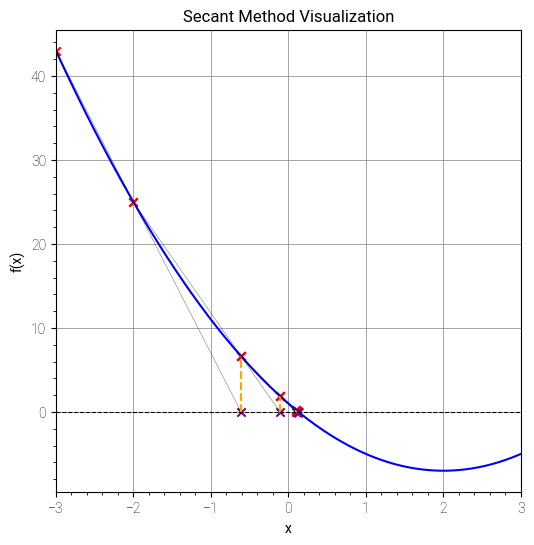

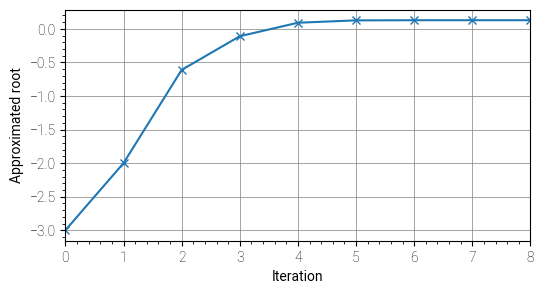

In [8]:
try:
    root, iterations, x_vals = secant_method(f, x0=-3, x1=-2)
    print(f"求得根的近似值: {root}")
    print(f"迭代次数: {iterations}")

    # 可视化
    visualize_secant(f, x_vals)
    visualize_convergence(x_vals)

except ValueError as e:
    print(e)